## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9707465	total: 58.9ms	remaining: 58.9s
1:	learn: 0.9530554	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9323111	total: 61ms	remaining: 20.3s
3:	learn: 0.9183073	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9024668	total: 63ms	remaining: 12.5s
5:	learn: 0.8858837	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8694887	total: 64.9ms	remaining: 9.2s
7:	learn: 0.8530745	total: 65.8ms	remaining: 8.15s
8:	learn: 0.8380654	total: 66.6ms	remaining: 7.33s
9:	learn: 0.8222019	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8062376	total: 68.2ms	remaining: 6.13s
11:	learn: 0.7917586	total: 68.9ms	remaining: 5.67s
12:	learn: 0.7773248	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7630295	total: 70.4ms	remaining: 4.96s
14:	learn: 0.7504725	total: 71.2ms	remaining: 4.68s
15:	learn: 0.7374866	total: 72ms	remaining: 4.42s
16:	learn: 0.7254759	total: 73ms	remaining: 4.22s
17:	learn: 0.7130875	total: 73.7ms	remaining: 4.02s
18:	learn: 0.7006823	total: 74.4ms	remaining: 3.84s
1

61:	learn: 0.4079648	total: 109ms	remaining: 1.65s
62:	learn: 0.4051936	total: 110ms	remaining: 1.64s
63:	learn: 0.4013960	total: 111ms	remaining: 1.62s
64:	learn: 0.3980060	total: 112ms	remaining: 1.61s
65:	learn: 0.3951794	total: 113ms	remaining: 1.59s
66:	learn: 0.3915528	total: 113ms	remaining: 1.58s
67:	learn: 0.3881625	total: 115ms	remaining: 1.57s
68:	learn: 0.3847298	total: 116ms	remaining: 1.56s
69:	learn: 0.3822510	total: 116ms	remaining: 1.55s
70:	learn: 0.3782252	total: 117ms	remaining: 1.53s
71:	learn: 0.3757434	total: 118ms	remaining: 1.52s
72:	learn: 0.3719249	total: 119ms	remaining: 1.51s
73:	learn: 0.3685802	total: 120ms	remaining: 1.5s
74:	learn: 0.3655828	total: 121ms	remaining: 1.49s
75:	learn: 0.3630504	total: 121ms	remaining: 1.48s
76:	learn: 0.3596111	total: 122ms	remaining: 1.47s
77:	learn: 0.3571881	total: 123ms	remaining: 1.45s
78:	learn: 0.3550882	total: 124ms	remaining: 1.45s
79:	learn: 0.3523574	total: 125ms	remaining: 1.43s
80:	learn: 0.3499538	total: 126m

159:	learn: 0.2433508	total: 192ms	remaining: 1.01s
160:	learn: 0.2428142	total: 193ms	remaining: 1s
161:	learn: 0.2422374	total: 193ms	remaining: 1s
162:	learn: 0.2417794	total: 194ms	remaining: 998ms
163:	learn: 0.2406195	total: 195ms	remaining: 994ms
164:	learn: 0.2397135	total: 196ms	remaining: 991ms
165:	learn: 0.2389930	total: 197ms	remaining: 988ms
166:	learn: 0.2384165	total: 198ms	remaining: 986ms
167:	learn: 0.2380562	total: 198ms	remaining: 982ms
168:	learn: 0.2373686	total: 199ms	remaining: 979ms
169:	learn: 0.2361702	total: 200ms	remaining: 976ms
170:	learn: 0.2354728	total: 201ms	remaining: 973ms
171:	learn: 0.2350338	total: 202ms	remaining: 970ms
172:	learn: 0.2341630	total: 202ms	remaining: 968ms
173:	learn: 0.2332534	total: 203ms	remaining: 965ms
174:	learn: 0.2329370	total: 204ms	remaining: 962ms
175:	learn: 0.2327016	total: 205ms	remaining: 958ms
176:	learn: 0.2320156	total: 206ms	remaining: 956ms
177:	learn: 0.2318096	total: 206ms	remaining: 953ms
178:	learn: 0.2311

287:	learn: 0.1779971	total: 300ms	remaining: 743ms
288:	learn: 0.1773768	total: 301ms	remaining: 742ms
289:	learn: 0.1769864	total: 302ms	remaining: 740ms
290:	learn: 0.1765082	total: 303ms	remaining: 738ms
291:	learn: 0.1759364	total: 304ms	remaining: 737ms
292:	learn: 0.1754127	total: 305ms	remaining: 735ms
293:	learn: 0.1749344	total: 305ms	remaining: 734ms
294:	learn: 0.1745546	total: 306ms	remaining: 732ms
295:	learn: 0.1740719	total: 307ms	remaining: 731ms
296:	learn: 0.1738420	total: 308ms	remaining: 729ms
297:	learn: 0.1736766	total: 309ms	remaining: 727ms
298:	learn: 0.1731227	total: 310ms	remaining: 726ms
299:	learn: 0.1728129	total: 310ms	remaining: 724ms
300:	learn: 0.1724130	total: 311ms	remaining: 723ms
301:	learn: 0.1718708	total: 312ms	remaining: 721ms
302:	learn: 0.1716918	total: 313ms	remaining: 720ms
303:	learn: 0.1715921	total: 314ms	remaining: 718ms
304:	learn: 0.1713213	total: 314ms	remaining: 717ms
305:	learn: 0.1711019	total: 315ms	remaining: 715ms
306:	learn: 

383:	learn: 0.1457292	total: 382ms	remaining: 612ms
384:	learn: 0.1456228	total: 383ms	remaining: 611ms
385:	learn: 0.1455177	total: 383ms	remaining: 610ms
386:	learn: 0.1450333	total: 384ms	remaining: 609ms
387:	learn: 0.1446515	total: 385ms	remaining: 607ms
388:	learn: 0.1443518	total: 386ms	remaining: 606ms
389:	learn: 0.1440280	total: 387ms	remaining: 605ms
390:	learn: 0.1438879	total: 388ms	remaining: 604ms
391:	learn: 0.1438065	total: 389ms	remaining: 603ms
392:	learn: 0.1434169	total: 389ms	remaining: 601ms
393:	learn: 0.1431077	total: 390ms	remaining: 600ms
394:	learn: 0.1429070	total: 391ms	remaining: 599ms
395:	learn: 0.1426691	total: 392ms	remaining: 598ms
396:	learn: 0.1425717	total: 393ms	remaining: 596ms
397:	learn: 0.1421801	total: 394ms	remaining: 595ms
398:	learn: 0.1417591	total: 394ms	remaining: 594ms
399:	learn: 0.1413089	total: 395ms	remaining: 593ms
400:	learn: 0.1411715	total: 396ms	remaining: 591ms
401:	learn: 0.1411314	total: 397ms	remaining: 590ms
402:	learn: 

510:	learn: 0.1151368	total: 491ms	remaining: 469ms
511:	learn: 0.1149058	total: 491ms	remaining: 468ms
512:	learn: 0.1148809	total: 492ms	remaining: 468ms
513:	learn: 0.1147239	total: 493ms	remaining: 466ms
514:	learn: 0.1146542	total: 494ms	remaining: 465ms
515:	learn: 0.1144427	total: 495ms	remaining: 464ms
516:	learn: 0.1142143	total: 496ms	remaining: 463ms
517:	learn: 0.1139497	total: 497ms	remaining: 462ms
518:	learn: 0.1137432	total: 497ms	remaining: 461ms
519:	learn: 0.1135425	total: 498ms	remaining: 460ms
520:	learn: 0.1133132	total: 499ms	remaining: 459ms
521:	learn: 0.1130809	total: 500ms	remaining: 458ms
522:	learn: 0.1128724	total: 501ms	remaining: 457ms
523:	learn: 0.1126020	total: 502ms	remaining: 456ms
524:	learn: 0.1123609	total: 502ms	remaining: 454ms
525:	learn: 0.1121727	total: 503ms	remaining: 453ms
526:	learn: 0.1120017	total: 504ms	remaining: 452ms
527:	learn: 0.1117306	total: 505ms	remaining: 451ms
528:	learn: 0.1114190	total: 506ms	remaining: 450ms
529:	learn: 

608:	learn: 0.0962654	total: 572ms	remaining: 367ms
609:	learn: 0.0960344	total: 573ms	remaining: 366ms
610:	learn: 0.0959737	total: 573ms	remaining: 365ms
611:	learn: 0.0958043	total: 574ms	remaining: 364ms
612:	learn: 0.0955709	total: 575ms	remaining: 363ms
613:	learn: 0.0954075	total: 576ms	remaining: 362ms
614:	learn: 0.0952022	total: 577ms	remaining: 361ms
615:	learn: 0.0950075	total: 578ms	remaining: 360ms
616:	learn: 0.0948620	total: 578ms	remaining: 359ms
617:	learn: 0.0946617	total: 579ms	remaining: 358ms
618:	learn: 0.0944647	total: 580ms	remaining: 357ms
619:	learn: 0.0943334	total: 581ms	remaining: 356ms
620:	learn: 0.0941492	total: 582ms	remaining: 355ms
621:	learn: 0.0939269	total: 583ms	remaining: 354ms
622:	learn: 0.0936855	total: 583ms	remaining: 353ms
623:	learn: 0.0935180	total: 584ms	remaining: 352ms
624:	learn: 0.0932730	total: 585ms	remaining: 351ms
625:	learn: 0.0931357	total: 586ms	remaining: 350ms
626:	learn: 0.0930028	total: 587ms	remaining: 349ms
627:	learn: 

740:	learn: 0.0767264	total: 681ms	remaining: 238ms
741:	learn: 0.0765720	total: 682ms	remaining: 237ms
742:	learn: 0.0763922	total: 683ms	remaining: 236ms
743:	learn: 0.0761811	total: 684ms	remaining: 235ms
744:	learn: 0.0760387	total: 684ms	remaining: 234ms
745:	learn: 0.0758679	total: 685ms	remaining: 233ms
746:	learn: 0.0756592	total: 686ms	remaining: 232ms
747:	learn: 0.0755236	total: 687ms	remaining: 231ms
748:	learn: 0.0753636	total: 688ms	remaining: 231ms
749:	learn: 0.0753166	total: 689ms	remaining: 230ms
750:	learn: 0.0751638	total: 690ms	remaining: 229ms
751:	learn: 0.0750841	total: 691ms	remaining: 228ms
752:	learn: 0.0749621	total: 691ms	remaining: 227ms
753:	learn: 0.0747982	total: 692ms	remaining: 226ms
754:	learn: 0.0746769	total: 693ms	remaining: 225ms
755:	learn: 0.0745554	total: 694ms	remaining: 224ms
756:	learn: 0.0744064	total: 695ms	remaining: 223ms
757:	learn: 0.0743139	total: 695ms	remaining: 222ms
758:	learn: 0.0742685	total: 696ms	remaining: 221ms
759:	learn: 

838:	learn: 0.0651669	total: 763ms	remaining: 146ms
839:	learn: 0.0650685	total: 764ms	remaining: 145ms
840:	learn: 0.0649889	total: 764ms	remaining: 145ms
841:	learn: 0.0649205	total: 765ms	remaining: 144ms
842:	learn: 0.0648620	total: 766ms	remaining: 143ms
843:	learn: 0.0647545	total: 767ms	remaining: 142ms
844:	learn: 0.0646110	total: 768ms	remaining: 141ms
845:	learn: 0.0645135	total: 768ms	remaining: 140ms
846:	learn: 0.0644578	total: 769ms	remaining: 139ms
847:	learn: 0.0643955	total: 770ms	remaining: 138ms
848:	learn: 0.0643026	total: 771ms	remaining: 137ms
849:	learn: 0.0642168	total: 772ms	remaining: 136ms
850:	learn: 0.0640337	total: 773ms	remaining: 135ms
851:	learn: 0.0639357	total: 774ms	remaining: 134ms
852:	learn: 0.0638730	total: 774ms	remaining: 133ms
853:	learn: 0.0637710	total: 775ms	remaining: 133ms
854:	learn: 0.0636351	total: 776ms	remaining: 132ms
855:	learn: 0.0635868	total: 777ms	remaining: 131ms
856:	learn: 0.0634985	total: 778ms	remaining: 130ms
857:	learn: 

970:	learn: 0.0534922	total: 871ms	remaining: 26ms
971:	learn: 0.0534038	total: 872ms	remaining: 25.1ms
972:	learn: 0.0532967	total: 873ms	remaining: 24.2ms
973:	learn: 0.0532348	total: 874ms	remaining: 23.3ms
974:	learn: 0.0531144	total: 875ms	remaining: 22.4ms
975:	learn: 0.0530393	total: 876ms	remaining: 21.5ms
976:	learn: 0.0529511	total: 877ms	remaining: 20.6ms
977:	learn: 0.0528789	total: 877ms	remaining: 19.7ms
978:	learn: 0.0527886	total: 878ms	remaining: 18.8ms
979:	learn: 0.0526457	total: 879ms	remaining: 17.9ms
980:	learn: 0.0524963	total: 880ms	remaining: 17ms
981:	learn: 0.0524712	total: 880ms	remaining: 16.1ms
982:	learn: 0.0524131	total: 882ms	remaining: 15.3ms
983:	learn: 0.0523397	total: 883ms	remaining: 14.4ms
984:	learn: 0.0522696	total: 884ms	remaining: 13.5ms
985:	learn: 0.0521676	total: 884ms	remaining: 12.6ms
986:	learn: 0.0520729	total: 885ms	remaining: 11.7ms
987:	learn: 0.0519784	total: 886ms	remaining: 10.8ms
988:	learn: 0.0519732	total: 887ms	remaining: 9.86

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

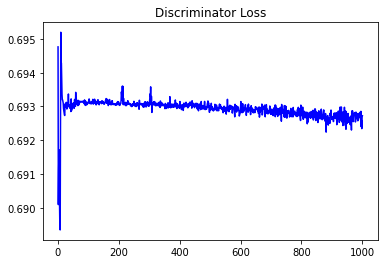

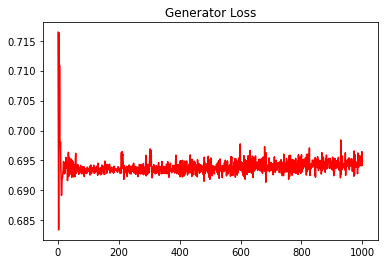

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09224739513547912


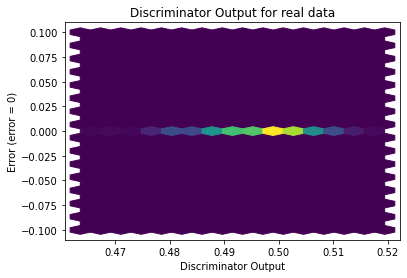

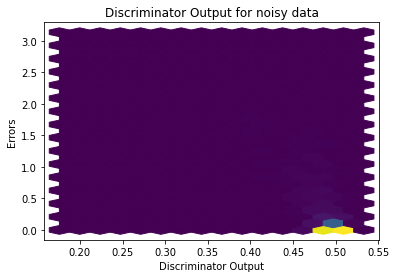

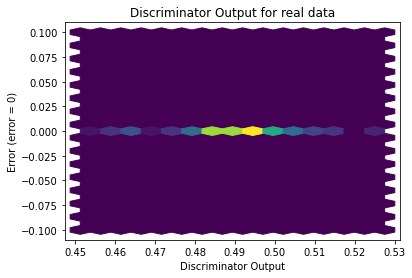

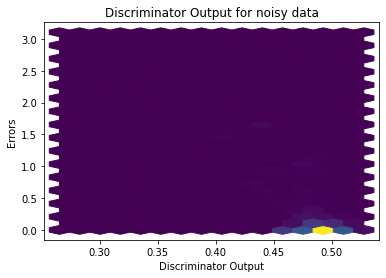

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


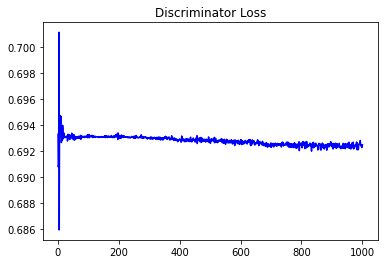

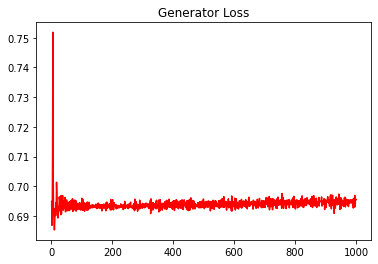

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10929319757718697


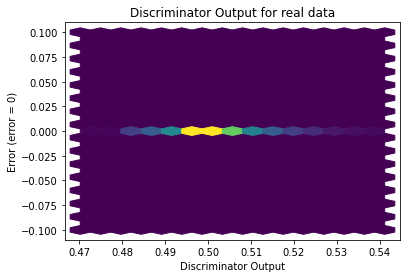

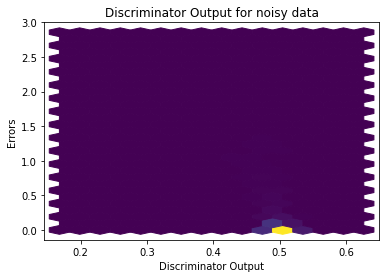

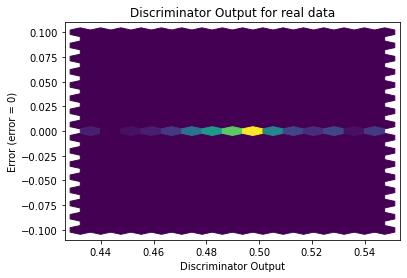

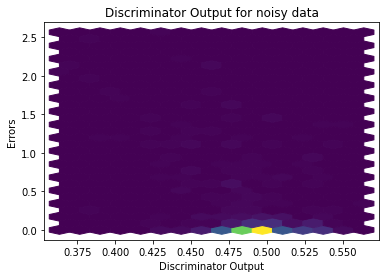

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3307]], requires_grad=True)
